# Anahit Manukyan
## Homework 4

In [1]:
#!pip install quandl
#!pip install plotly
#!pip install pandas_datareader

In [2]:
import pandas as pd #for reading and working with data
import matplotlib.pyplot as plt #for visuals
import seaborn as sns #for visuals
import numpy as np #for doing math/stat calculations, working with arrays

import quandl #for downloading data from Quandl website
from pandas_datareader import data #for downloading data from Yahoo Finance website

##plotly is for interactive plotting
from plotly.offline import iplot
from plotly.offline import init_notebook_mode
import plotly.graph_objects as go #the basic charts that we will use are mainly stored under graph_objs
init_notebook_mode(connected=True) #if we want the charts to be displayed in JN

In [3]:
import plotly.express as px

**Problem 1.** Reading the data

In [4]:
df = pd.read_csv(r'C:\\Users\\User\\salary.csv')

In [5]:
df.head(3)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,Geder,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,NaN,Widowed,NaN,Not-in-family,White,Female,NaN,4356.0,40.0,United-States,<=50K
1,82,Private,132870,HS-grad,NaN,Widowed,Exec-managerial,Not-in-family,White,Female,NaN,4356.0,18.0,United-States,<=50K
2,66,?,186061,Some-college,10.0,Widowed,NaN,Unmarried,Black,Female,NaN,4356.0,40.0,United-States,<=50K


**Problem 2.** How many rows and how many columns the dataset has?

In [6]:
df.shape

(32561, 15)

In [7]:
print("The columns of the dataset are: ", df.columns)

The columns of the dataset are:  Index(['age', 'workclass', 'fnlwgt', 'education', 'education.num',
       'marital.status', 'occupation', 'relationship', 'race', 'Geder',
       'capital.gain', 'capital.loss', 'hours.per.week', 'native.country',
       'income'],
      dtype='object')


The dataset contains 32561 rows and 15 columns. 

**Problem 3.**  How many missing values does each variable contain?

In [8]:
df.isna().any()

age               False
workclass         False
fnlwgt            False
education         False
education.num      True
marital.status    False
occupation         True
relationship      False
race              False
Geder             False
capital.gain       True
capital.loss       True
hours.per.week     True
native.country     True
income            False
dtype: bool

Among the 15 variables, 6 has missing values. Let's check how many missing values each variable has. 

In [9]:
df.isnull().sum()

age                   0
workclass             0
fnlwgt                0
education             0
education.num     14754
marital.status        0
occupation         1843
relationship          0
race                  0
Geder                 0
capital.gain      29849
capital.loss      31042
hours.per.week      458
native.country      583
income                0
dtype: int64

The results show, that the missing values have considerable weight on the dataset. The variables "capital.loss", "capital.gain" and "education.num" have the most number of missing values. The others', "occupation", "hours.per.week" and "native.country" have missing values as well, however, the ratio is not that big. 

In [10]:
print("Overall, the sum of missing values of the dataset is:", df.isnull().sum().sum())

Overall, the sum of missing values of the dataset is: 78529


**Problem 4.** Handling missing values: 

**P.4- a.** If you have noticed column “workclass” contains lots of ‘?’ signs
instead of blank values. Replace all ‘?’ with NA values.

In [11]:
df.workclass.head()

0          ?
1    Private
2          ?
3    Private
4    Private
Name: workclass, dtype: object

In [12]:
df.loc[df['workclass']=="?", ['workclass']].count()

workclass    1836
dtype: int64

As we can see, "workclass" has 1836 "?" signs as its values 

In [13]:
df["workclass"] = df["workclass"].replace("?", np.nan)

In [14]:
df["workclass"].head()

0        NaN
1    Private
2        NaN
3    Private
4    Private
Name: workclass, dtype: object

In [15]:
df["workclass"].isna().sum()

1836

As we can see, the "?" marks are changed into NaN values. And the overall number of missing values has became: 1836

**P.4- b.** Drop the columns which have more than 1700 missing values

In [16]:
for x in df.columns :
    if(df[x].isna().sum()>1700):
        df = df.drop(x, axis=1)
        print(x, "is dropped")

workclass is dropped
education.num is dropped
occupation is dropped
capital.gain is dropped
capital.loss is dropped


In the statement we loop through all the columns of the dataset. In the IF statement, we check if the total number of NA values exceeds 1700, and if the condition is true, the columns are dropped from the dataset. Also, here you can see the dropped columns printed. 

In [17]:
print("The data already has", len(df.columns), "columns")

The data already has 10 columns


As we can see, after the operation, the number of columns have decrease, as we dropped 5 of them

**P.4- c.**  Drop all rows that have at least one missing value. 

In [18]:
df.dropna(inplace=True)

**P.4- d.**  What is the shape of the data after dropping missing values?

In [19]:
df.shape

(31527, 10)

In [20]:
df.isna().sum()

age               0
fnlwgt            0
education         0
marital.status    0
relationship      0
race              0
Geder             0
hours.per.week    0
native.country    0
income            0
dtype: int64

Previously, our data had 32561 rows and 15 columns, after cleaning the data, now it has 31527 rows and 10 columns. Also, as we can see, none of the variables has missing values. 

**Problem 5.** In some of the column headings, there are ‘.’ sign (e.g. marital.status),
replace ‘.’ sign with ‘_’ underscore sign.

In [21]:
df.columns = df.columns.str.replace(".", "_")

<ipython-input-21-79d6ae8d4fae>:1: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.



In [22]:
df.columns

Index(['age', 'fnlwgt', 'education', 'marital_status', 'relationship', 'race',
       'Geder', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

As we can see, "." are changed into "_"

**Problem 6.** Check correlation between “age”, “fnlwgt”, “hours per week” columns. In
absolute value, which variables have the highest correlation? 

In [23]:
age = df.age
fnl = df.fnlwgt
hours = df.hours_per_week

In [24]:
print("The correlation between age and fnl is: \n", np.corrcoef(age, fnl))
print("The correlation between age and hours per week is: \n", np.corrcoef(age, hours))
print("The correlation between fnl and fnl hours: \n", np.corrcoef(fnl, hours))

The correlation between age and fnl is: 
 [[ 1.         -0.07723431]
 [-0.07723431  1.        ]]
The correlation between age and hours per week is: 
 [[1.         0.10341756]
 [0.10341756 1.        ]]
The correlation between fnl and fnl hours: 
 [[ 1.         -0.02347635]
 [-0.02347635  1.        ]]


In [25]:
print("The absolute correlation between age and fnl is:", abs(np.corrcoef(age, fnl)[0][1]))
print("The absolute correlation between age and hours per week is:", abs(np.corrcoef(age, hours)[0][1]))
print("The absolute correlation between fnl and fnl hours:", abs(np.corrcoef(fnl, hours)[0][1]))

The absolute correlation between age and fnl is: 0.07723431204993926
The absolute correlation between age and hours per week is: 0.10341755799697355
The absolute correlation between fnl and fnl hours: 0.023476348420641092


In [26]:
max(abs(np.corrcoef(age, fnl)[0][1]), abs(np.corrcoef(age, hours)[0][1]), abs(np.corrcoef(fnl, hours)[0][1]))

0.10341755799697355

As we can see from the results, age and hours per week have the strongest correlation among the  set. As the numbers approach 1 or -1, the correlations gets stronger. 

**P.6- a** Visualize table of correlations created above through heatmap from
seaborn library. 

In [27]:
data_numeric = df.select_dtypes(include='number')
data_numeric.columns

Index(['age', 'fnlwgt', 'hours_per_week'], dtype='object')

On the first step of caluclations, let's take only the numeric columns. As we can see, we have only 3 numeric columns. For the other steps, we'll use Heatmap from Seaborn library to visualise correlations between all numeric variables in the dataset.

In [28]:
# Here is the simple table of correlations 
data_numeric.corr().round(2)

,age,fnlwgt,hours_per_week
age,1.00,-0.08,0.10
fnlwgt,-0.08,1.00,-0.02
hours_per_week,0.10,-0.02,1.00


<ipython-input-29-2ac967d8df66>:2: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



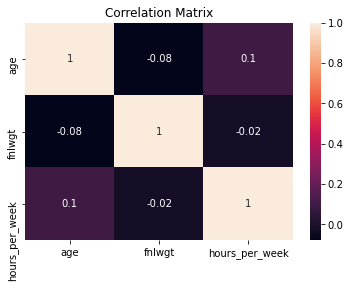

In [29]:
sns.heatmap(data_numeric.corr().round(2), annot=True)
plt.axes().set_title("Correlation Matrix")
plt.show()

**Problem 7.** Calculate the following measures: average age, median age, min age, max
age, st. dev of age.

In [30]:
from statistics import stdev

In [31]:
print("The average of age is: ", age.mean())
print("The minimum age is: ", min(age))
print("The maximum age is: ", max(age))
print("The standard deviation of age is: ", stdev(age))

The average of age is:  38.45196181051163
The minimum age is:  17
The maximum age is:  90
The standard deviation of age is:  13.45700340674027


**Problem 8.** Visualize relationships below by using either matplotlib.pyplot OR seaborn
modules. This script here might be helpful if you are not sure what types of charts to
choose. You are free to use other types of charts as well. You should use at least two
different types of charts.

**P.8- a.** Relationship between “Income” and “Age”

C:\Users\User\anaconda3\desktop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



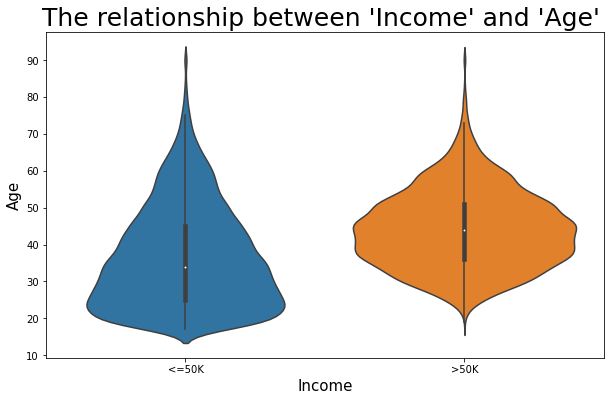

In [32]:
plt.figure(figsize=(10,6))
sns.violinplot(df.income, 
           df.age,
           orient='v')
plt.title("The relationship between 'Income' and 'Age' ", size=25)
plt.xlabel("Income", size=15)
plt.ylabel("Age", size=15)
plt.show()

Here you can see violin plots for Income and Age of employees. Violin plots are very similar to boxplots, but also show the density. Here, median, 25% and 75% quantiles are shown, and the colored parts show the densities. 
As we can see from the graphs, middle aged people, 40-50, get higher salaries than the others. Also, people getting <=50, are mostly from 20-40, since, the graph shows, the values are mosre dense. 
From the 2nd graph, we can see that the most populated parts are arround the median. 

**P.8- b.** Relationship between “Income” and “Gender”

Text(0, 0.5, 'Count')

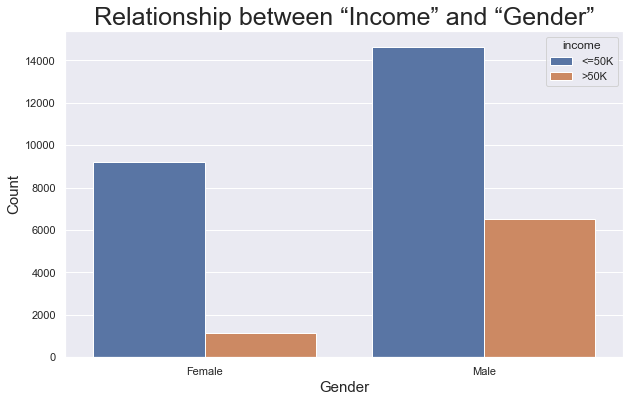

In [33]:
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(hue="income", x="Geder", data=df)

plt.title('Relationship between “Income” and “Gender”', size=25)
plt.xlabel("Gender", size=15)
plt.ylabel("Count", size=15)

In [34]:
#Female
print("Female", len(df.groupby('Geder').get_group("Female")))

#Male
print("Male", len(df.groupby('Geder').get_group("Male")))

Female 10377
Male 21150


The graph above shows the connection between income and gender. From the first glance, we might think that women tend to earn less than men. But the contrsasting part is that, the number of Females is more than twice less than the number of males in the company. Looking at the graphs, I do not think we can make clear assumptions.
That's why, the following graph shows the percentage for each category, which can be more reliable. 

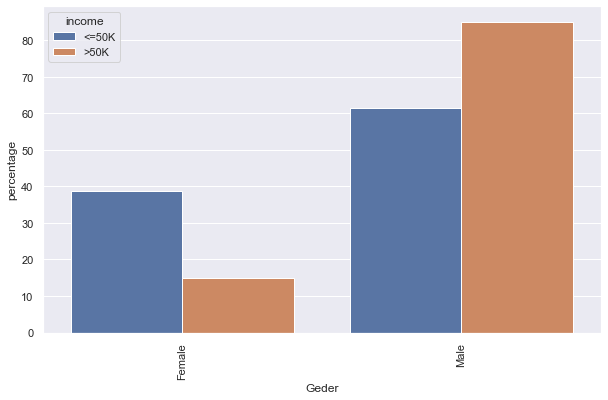

In [35]:
plt.figure(figsize=(10,6))
income_counts = (df.groupby(['income'])['Geder']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('Geder'))
p = sns.barplot(x="Geder", y="percentage", hue="income", data=income_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)

The percentage barplot shows that women tend to get lower than men. Among the >50K earners, less than 20% are women. But the cases of <=50K do not vary dramatically between gender to gender, if we consider the number differences. 

**P.8- c.** Relationship between “Income” and “Race”,

Text(0, 0.5, 'Count')

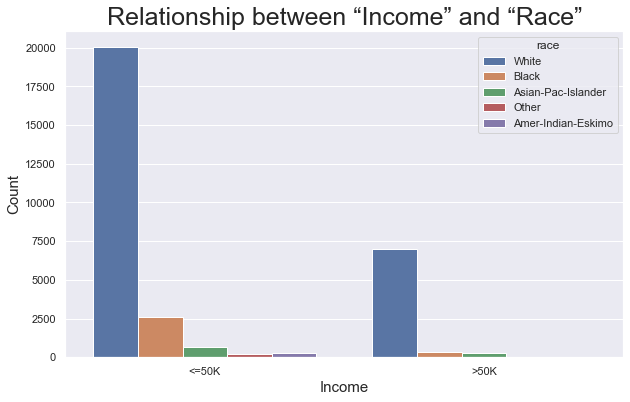

In [36]:
plt.figure(figsize=(10,6))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="income", hue="race", data=df)

plt.title('Relationship between “Income” and “Race”', size=25)
plt.xlabel("Income", size=15)
plt.ylabel("Count", size=15)

The data shows that the company has mainly white employees, and mostly, white people get >50K. Also, we can notice that some raced do not even get >50K. 
Let's look at the percentage barplot.

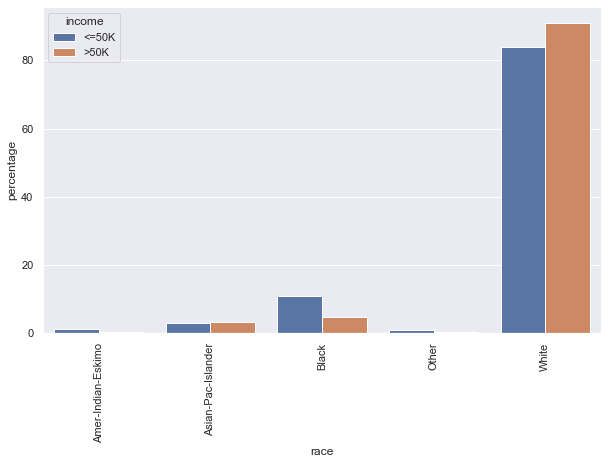

In [37]:
plt.figure(figsize=(10,6))
race_counts = (df.groupby(['income'])['race']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('race'))
p = sns.barplot(x="race", y="percentage", hue="income", data=race_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)

White people have the highest percent in getting >50K. Black people are mostly on the less income, and Amer-Indian_Eskimo or other races do not get higher than 50K. Asian-Pac-Islander people get approximately equally in both income categories. 

**P.8- d.** Relationship between “Age” and “hours per week”

Text(12.085, 0.5, 'Hour Per Week')

<Figure size 720x432 with 0 Axes>

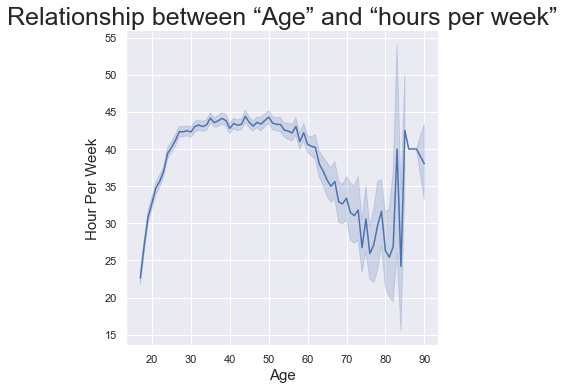

In [38]:
plt.figure(figsize=(10,6))
sns.relplot(x="age", y="hours_per_week", kind="line", data=df);

plt.title('Relationship between “Age” and “hours per week”', size=25)
plt.xlabel("Age", size=15)
plt.ylabel("Hour Per Week", size=15)

Using kind="line" offers the same flexibility for semantic mappings as kind="scatter", but lineplot() transforms the data more before plotting. By default, the resulting plot shows the mean and 95% CI for each unit.The function provides access to several different axes-level functions that show the relationship between two variables with semantic mappings of subsets.

As we can see from the graph, The most productive years are between 25 to 60. Later, the number of hours gradually decreases and we have strong variability after 70s. 

Also, I am interested to see the relationship between age and hours per week gender to gender. 

Text(16.321412500000008, 0.5, 'Hour Per Week')

<Figure size 720x432 with 0 Axes>

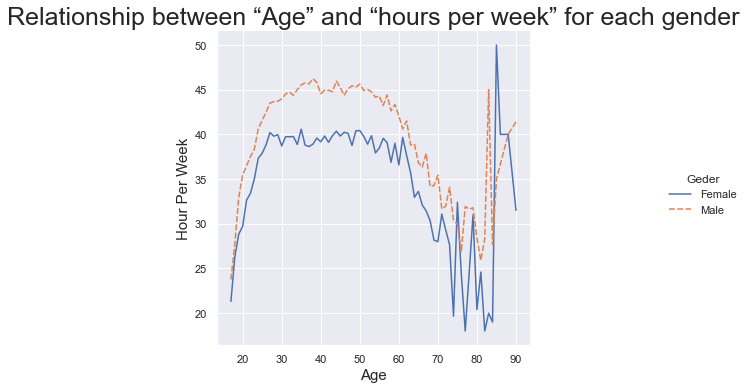

In [39]:
plt.figure(figsize=(10,6))
sns.relplot(
    data=df, x="age", y="hours_per_week", ci=None,
    hue="Geder", style="Geder", kind="line",
)

plt.title('Relationship between “Age” and “hours per week” for each gender', size=25)
plt.xlabel("Age", size=15)
plt.ylabel("Hour Per Week", size=15)

The graph has lots of variations. Starting from approximately the same point, females tend to work more stable from their 25's to 60s. And then, the number of hours decreases in a fast rate and has variations in a way that an 85 years of woman can work 50 houts a week. The case of males of more gradual. They gradually start working, then gradyally the hours decreases, but after their 80s, we can see fast changes. 
Overall, men reach their maximum at the middle ages, and in contrast, women reach at their 80s. 


**P.8 -e.** Relationship between “hours per week” and “Income”

C:\Users\User\anaconda3\desktop\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



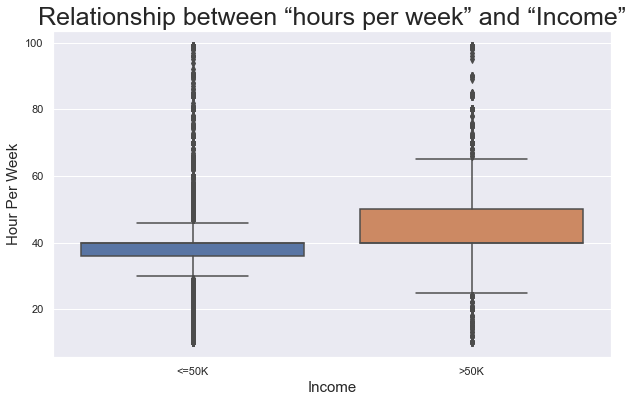

In [40]:
plt.figure(figsize=(10,6))
sns.boxplot(df.income, 
           df.hours_per_week,
           orient='v')
plt.title('Relationship between “hours per week” and “Income”', size=25)
plt.xlabel("Income", size=15)
plt.ylabel("Hour Per Week", size=15)

plt.show()

Again, we have 2 plots. 
Boxplot: By looking at the boxplot, the first thing we can notice are the excessive amounts of outliers. 

Here, in my opinion, is the most important graph. It is full of outliers, but shows that in average, the more you work, the more you get. 

The following calculations show the main results. 

In [41]:
income_less= df.groupby(["income"]).get_group("<=50K")
income_more= df.groupby(["income"]).get_group(">50K")

In [42]:
print("The average to work to get <=50K is", income_less.hours_per_week.mean())

print("The average to work to get >50K is", income_more.hours_per_week.mean())

The average to work to get <=50K is 39.3800050259675
The average to work to get >50K is 45.70265324794145


In [43]:
Q1 = income_less.hours_per_week.quantile(0.25)
Q3 = income_less.hours_per_week.quantile(0.75)
IQR = Q3 - Q1

less = ((income_less.hours_per_week < (Q1 - 1.5 * IQR)) | (income_less.hours_per_week > (Q3 + 1.5 * IQR))).sum()

In [44]:
Q1 = income_more.hours_per_week.quantile(0.25)
Q3 = income_more.hours_per_week.quantile(0.75)
IQR = Q3 - Q1

more = ((income_more.hours_per_week < (Q1 - 1.5 * IQR)) | (income_more.hours_per_week > (Q3 + 1.5 * IQR))).sum()

In [45]:
print("The number of outliers in <=50K income is", less)
print("The number of outliers in >50K income is", more)


The number of outliers in <=50K income is 7383
The number of outliers in >50K income is 459


As it is mentioned above, the graph has lots of outliers (the number of them is shown above). The IQR (also the difference between max and min) of >50K is greater than the IQR of <=50, which shows the range of hours is higher for >50K. 

**Problem 9.** Use for loop to visualize distribution of all numeric variables in the dataset

In [46]:
data_numeric.describe()

,age,fnlwgt,hours_per_week
count,31527.000000,3.152700e+04,31527.000000
mean,38.451962,1.898280e+05,40.914391
std,13.457003,1.055607e+05,11.706017
min,17.000000,1.228500e+04,10.000000
25%,28.000000,1.176830e+05,40.000000
50%,37.000000,1.784720e+05,40.000000
75%,47.000000,2.376270e+05,45.000000
max,90.000000,1.484705e+06,99.000000


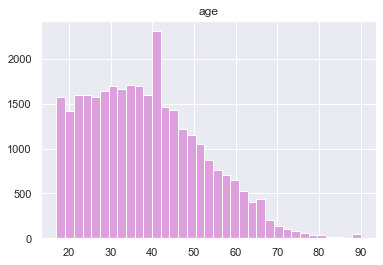

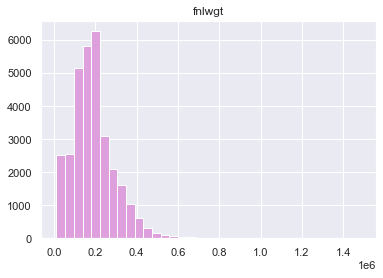

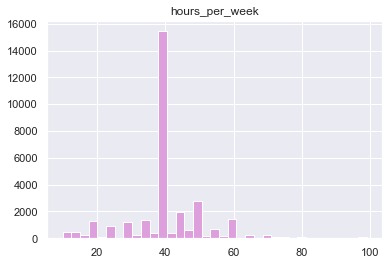

In [47]:
for i in data_numeric.columns:
    plt.hist(data_numeric[i],
          color = "plum", 
         bins=35
        )
    plt.title(i)
    plt.show()

**Problem 10.** Make a general conclusion about your findings. Basically, you need to 
answer the following question based on the charts and descriptive measures that you’ve 
calculated: What are the main characteristics of higher income earners?

The detailed descriptions of the graphs you can see under each graph.

As we can conclude, race, age and hours per week have direct influence on income. In my opinion, income and gender are not directly related, since the differences of the number of males and females differ significantly. 


Also, the distribution of age and fnlwgt is Right skewed. Hours per week is mostly centered on the mean, and can be similar to normal distribution (not significantly). 

**Problem 11.** Download from Yahoo Finance the data for the five stocks that you wish to invest in for [2008-01-01, 2021-01-01] period. From pandas_datareader.data use DataReader() function 

In [48]:
data_stocks=data.DataReader(name=['AAPL', 'DIS', 'AMZN', 'MRIN', 'TSLA'], #ticker of staock
                        data_source='yahoo', #source of data, for example 'fred' is another data source
                        start='2008-01-01', end='2021-01-01', #time period
                        pause=1 # to puase some time in seconds after each request to Yahoo, in order not to get blocked
                        )

In [49]:
data_stocks.head()

Attributes Adj Close                                     Close             \
Symbols         AAPL        DIS       AMZN MRIN TSLA      AAPL        DIS   
Date                                                                        
2008-01-02  5.983694  27.012505  96.250000  NaN  NaN  6.958571  31.840000   
2008-01-03  5.986459  26.953121  95.209999  NaN  NaN  6.961786  31.770000   
2008-01-04  5.529482  26.410151  88.790001  NaN  NaN  6.430357  31.129999   
2008-01-07  5.455470  26.435602  88.820000  NaN  NaN  6.344286  31.160000   
2008-01-08  5.259228  25.909611  87.879997  NaN  NaN  6.116071  30.540001   

Attributes                       ...      Open                             \
Symbols          AMZN MRIN TSLA  ...      AAPL        DIS       AMZN MRIN   
Date                             ...                                        
2008-01-02  96.250000  NaN  NaN  ...  7.116786  32.320000  95.349998  NaN   
2008-01-03  95.209999  NaN  NaN  ...  6.978929  31.879999  96.059998  NaN   
2008-01-04  88.790001  NaN  NaN  ...  6.837500  31.000000  93.260002  NaN   
2008-01-07  88.820000  NaN  NaN  ...  6.473214  31.379999  88.620003  NaN   
2008-01-08  87.879997  NaN  NaN  ...  6.433571  31.250000  87.550003  NaN   

Attributes             Volume                                    
Symbols    TSLA          AAPL         DIS        AMZN MRIN TSLA  
Date                                                             
2008-01-02  NaN  1.079179e+09   9269900.0  13858700.0  NaN  NaN  
2008-01-03  NaN  8.420664e+08   9681100.0   9122500.0  NaN  NaN  
2008-01-04  NaN  1.455832e+09   9550700.0  10270000.0  NaN  NaN  
2008-01-07  NaN  2.072193e+09  10742900.0   9981600.0  NaN  NaN  
2008-01-08  NaN  1.523816e+09  13014300.0  12283300.0  NaN  NaN  

[5 rows x 30 columns]

In [50]:
data_stocks.columns=data_stocks.columns.map('_'.join)

**Problem 12.** Use plotly.offline to create an interactive chart that will show how the Open
prices of the stocks (imported above) have changed over time. Only one chart should be 
created.

In [51]:
fig=go.Figure()

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Open_AAPL,
                        mode='lines',
                        name='Open Price of AAPL'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Open_DIS,
                        mode='lines',
                        name='Open Price of DIS'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Open_AMZN,
                        mode='lines',
                        name='Open Price of AMZN'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Open_MRIN,
                        mode='lines',
                        name='Open Price of MRIN'))

fig.add_trace(go.Scatter(x=data_stocks.index,
                        y=data_stocks.Open_TSLA,
                        mode='lines',
                        name='Open Price of TSLA'))

fig.update_layout(title='Comparison of Open Prices Between the 5 chosen Stocks')

fig.show()

**Problem 13.** Premium question. By using for loop create an interactive histogram for ‘age’, ‘hours per week’ and ‘fnlwgt’ variables. What is your conclusion about distribution of those variables?

In [52]:
for x in data_numeric.columns: 
    px.histogram(data_numeric, x=x).show()

### Thanks for your attention